# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
weather_api_key = os.getenv('weather_api_key')

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | newman
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | doctor alberto oviedo mota
Processing Record 8 of Set 1 | isiro
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | sinop
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | wyrzysk
Processing Record 14 of Set 1 | xinqing
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | bandarbeyla
Processing Record 18 of Set 1 | belyayevka
Processing Record 19 of Set 1 | tofol
Processing Record 20 of Set 1 | puerto baquerizo moreno
Processing Record 21 of Set 1 | la ronge
P

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,-2.07,76,52,2.98,RU,1727469206
1,waitangi,-43.9535,-176.5597,7.68,86,69,4.02,NZ,1727469207
2,newman,37.3138,-121.0208,36.07,12,0,2.13,US,1727469208
3,anadyr,64.7500,177.4833,2.28,69,40,5.00,RU,1727469209
4,edinburgh of the seven seas,-37.0676,-12.3116,11.29,66,98,6.71,SH,1727469211


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-2.07,76,52,2.98,RU,1727469206
1,waitangi,-43.9535,-176.5597,7.68,86,69,4.02,NZ,1727469207
2,newman,37.3138,-121.0208,36.07,12,0,2.13,US,1727469208
3,anadyr,64.7500,177.4833,2.28,69,40,5.00,RU,1727469209
4,edinburgh of the seven seas,-37.0676,-12.3116,11.29,66,98,6.71,SH,1727469211


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

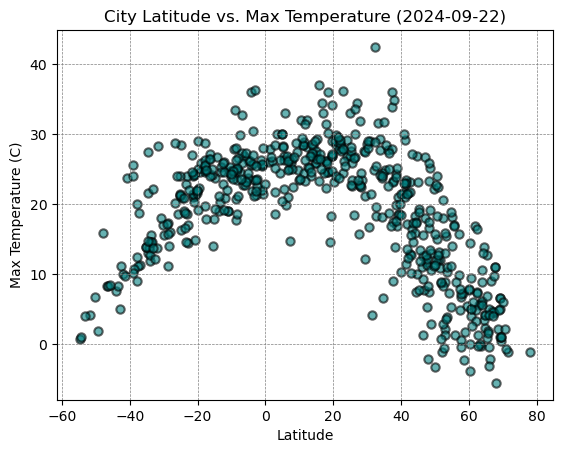

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='teal', alpha=0.6, edgecolor='black',linewidth=1.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-09-22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

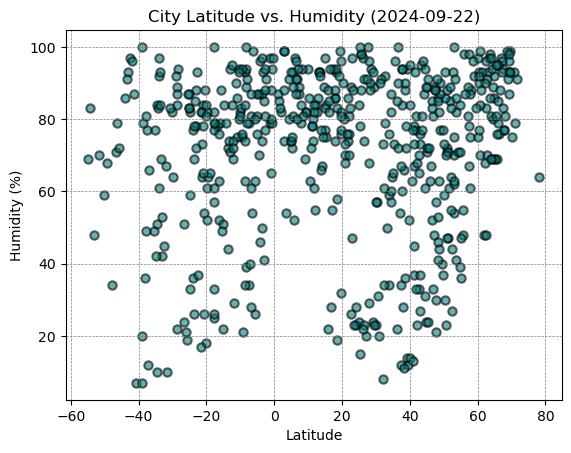

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],color='teal', alpha=0.6, edgecolor='black',linewidth=1.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-09-22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

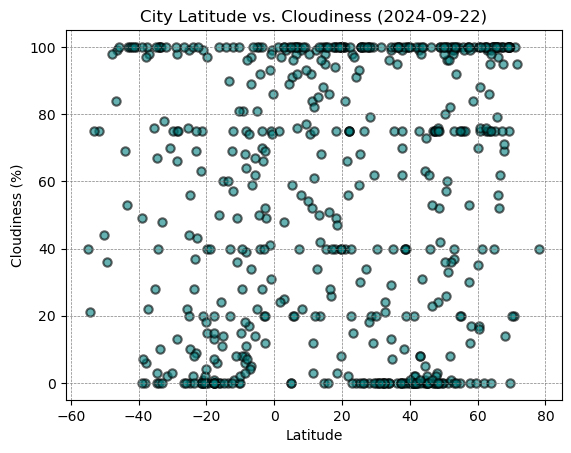

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],color='teal', alpha=0.6, edgecolor='black',linewidth=1.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-09-22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

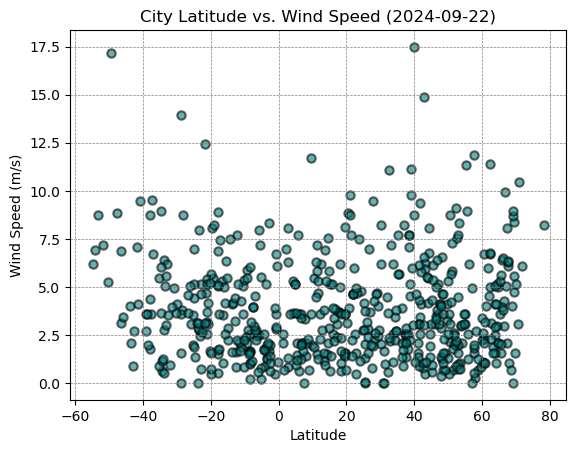

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],color='teal', alpha=0.6, edgecolor='black',linewidth=1.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-09-22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def regression(x,y, title='Linear Regression Plot', x_label='X-axis', y_label='Y-axis'):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    x_pos = x.min() + (x.max() - x.min()) * 0.2
    y_pos = y.max() * 0.2
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f'The r^2-value is: {r_squared}')

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-2.07,76,52,2.98,RU,1727469206
2,newman,37.3138,-121.0208,36.07,12,0,2.13,US,1727469208
3,anadyr,64.7500,177.4833,2.28,69,40,5.00,RU,1727469209
6,doctor alberto oviedo mota,32.2275,-115.1697,42.49,8,0,0.57,MX,1727469213
7,isiro,2.7739,27.6160,18.63,99,100,0.83,CD,1727468956


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,7.68,86,69,4.02,NZ,1727469207
4,edinburgh of the seven seas,-37.0676,-12.3116,11.29,66,98,6.71,SH,1727469211
5,bredasdorp,-34.5322,20.0403,13.01,84,67,0.62,ZA,1727469212
18,puerto baquerizo moreno,-0.9000,-89.6000,25.55,65,75,6.69,EC,1727469227
21,avarua,-21.2078,-159.7750,24.03,64,75,2.57,CK,1727469230


###  Temperature vs. Latitude Linear Regression Plot

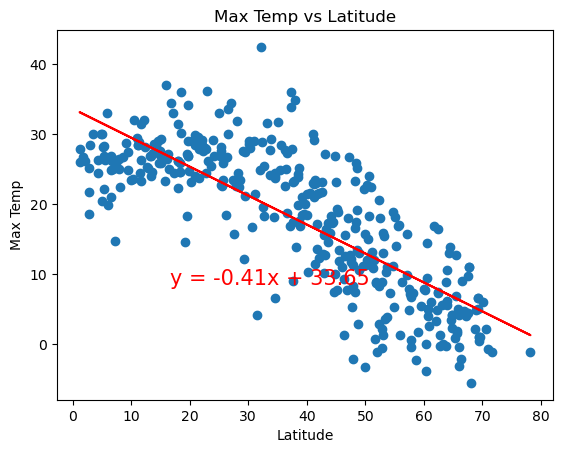

The r^2-value is: 0.6339653514428119


In [20]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],title='Max Temp vs Latitude',x_label='Latitude',y_label='Max Temp')

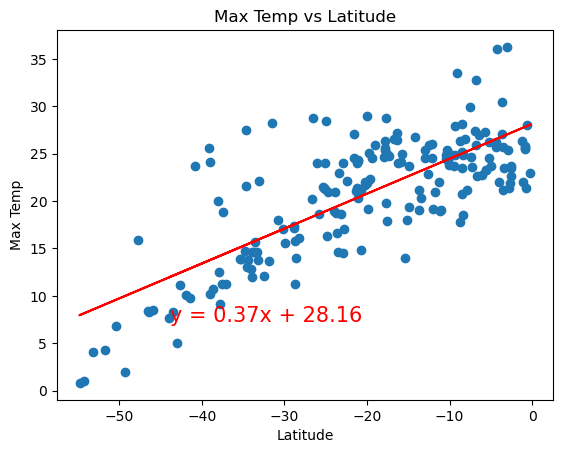

The r^2-value is: 0.5833381879015178


In [21]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],title='Max Temp vs Latitude',x_label='Latitude',y_label='Max Temp')

**Discussion about the linear relationship:** The max temperature of the cities in our sample is pretty dependent the latitude, as evidenced by an r^2 value of greater than 0.5 for both the Northern and Southern Hemispheres. The max temperature seems to be more dependent the latitude for the Northern Hemisphere, but this could also be biased by the fact that we have more data on the Northern Hemisphere than the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

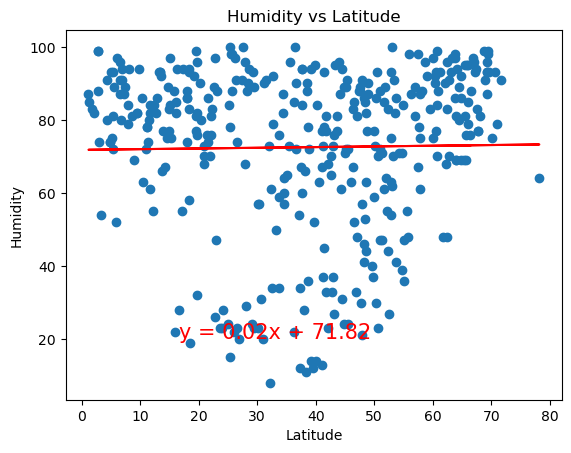

The r^2-value is: 0.0002601047202547306


In [22]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],title='Humidity vs Latitude',x_label='Latitude',y_label='Humidity')

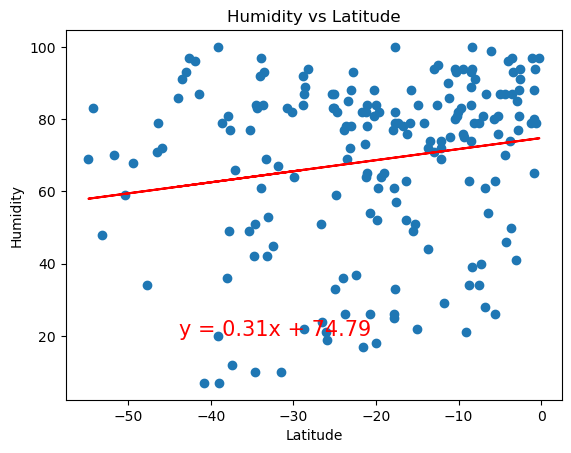

The r^2-value is: 0.030429705601985328


In [23]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],title='Humidity vs Latitude',x_label='Latitude',y_label='Humidity')

**Discussion about the linear relationship:** There is not much dependency between latitude and humidity for both the Northern and Southern Hemispheres, as evidenced by r^2 values close to zero.

### Cloudiness vs. Latitude Linear Regression Plot

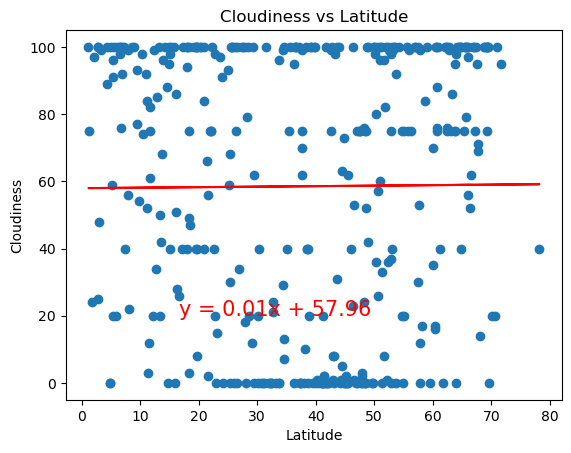

The r^2-value is: 5.314862275535047e-05


In [24]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],title='Cloudiness vs Latitude',x_label='Latitude',y_label='Cloudiness')

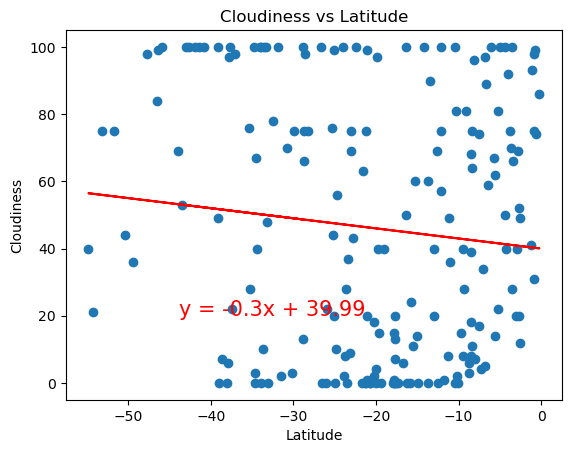

The r^2-value is: 0.011553196353171577


In [25]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],title='Cloudiness vs Latitude',x_label='Latitude',y_label='Cloudiness')

**Discussion about the linear relationship:** There is not much dependency between latitude and humidity for both the Northern and Southern Hemispheres, as evidenced by r^2 values close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

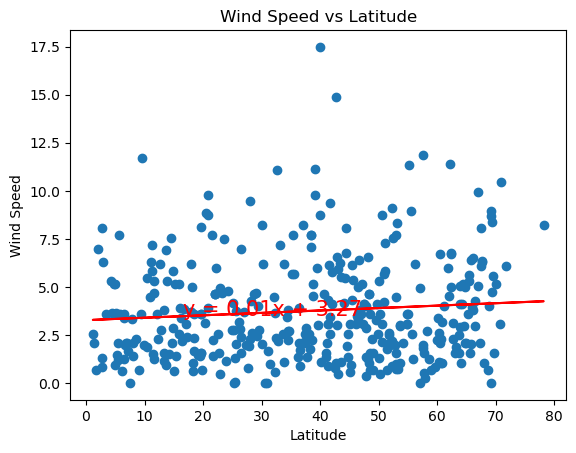

The r^2-value is: 0.00851681661178768


In [29]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],title='Wind Speed vs Latitude',x_label='Latitude',y_label='Wind Speed')

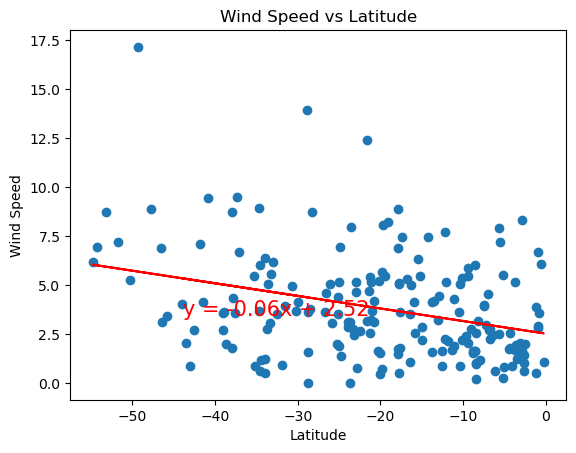

The r^2-value is: 0.1055470134188338


In [28]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],title='Wind Speed vs Latitude',x_label='Latitude',y_label='Wind Speed')

**Discussion about the linear relationship:** There is not much dependency between latitude and humidity for both the Northern and Southern Hemispheres, as evidenced by r^2 values close to zero.